                                     Importanto o arquivo CSV

In [4]:
import pandas as pd

In [5]:
data = "C:\dataframe\pokemonFavoritos.csv"

In [6]:
dados = pd.read_csv(data)

In [7]:
dados

,Pokemon,Votos,Tipo,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Select a Pokémon here to see how many votes it got,Unnamed: 8,Unnamed: 9,...,Unnamed: 16,Number of pokemon by number of votes,Unnamed: 18,Unnamed: 19,Unnamed: 20,By type,Psychic,Unnamed: 23,By Gen,5
0,Bulbasaur,710,Grass Poison,1,Bulbasaur,NaN,NaN,Fletchling,6,NaN,...,NaN,Pokemon,Votes,%,NaN,Pokemon,Votes,NaN,Pokemon,Votes
1,Ivysaur,83,Grass Poison,1,Bulbasaur,NaN,NaN,NaN,NaN,NaN,...,NaN,4,0,0.49%,NaN,Gardevoir,585,NaN,Volcarona,290
2,Venusaur,127,Grass Poison,1,Bulbasaur,NaN,NaN,NaN,NaN,NaN,...,NaN,8,1,0.99%,NaN,Metagross,395,NaN,Chandelure,222
3,Charmander,374,Fire,1,Charmander,NaN,NaN,Number of valid votes:,52725,NaN,...,NaN,28,2,3.46%,NaN,Espeon,384,NaN,Hydreigon,166
4,Charmeleon,70,Fire,1,Charmander,NaN,NaN,Average per pokémon,65,NaN,...,NaN,24,3,2.97%,NaN,Alakazam,376,NaN,Zoroark,159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804,Stakataka,13,Rock Steel,7,Stakataka,NaN,NaN,NaN,NaN,NaN,...,NaN,0,803,0.00%,NaN,NaN,NaN,NaN,NaN,NaN
805,Blacephalon,8,Fire Ghost,7,Blacephalon,NaN,NaN,NaN,NaN,NaN,...,NaN,0,804,0.00%,NaN,NaN,NaN,NaN,NaN,NaN
806,Zeraora,17,Electric,7,Zeraora,NaN,NaN,NaN,NaN,NaN,...,NaN,0,805,0.00%,NaN,NaN,NaN,NaN,NaN,NaN
807,Meltan,3,Steel,7,Meltan,NaN,NaN,NaN,NaN,NaN,...,NaN,0,806,0.00%,NaN,NaN,NaN,NaN,NaN,NaN


                                        Calculando a centralidade 

In [8]:
media_votos = dados['Votos'].mean()
mediana_votos = dados['Votos'].median()
moda_votos = dados['Votos'].mode()

In [9]:
print("Medidas de Centralidade dos Votos:")
print("Média:", media_votos)
print("Mediana:", mediana_votos)
print("Moda:", moda_votos)

Medidas de Centralidade dos Votos:
Média: 65.17305315203956
Mediana: 23.0
Moda: 0    5
Name: Votos, dtype: int64


                                         Calculando a dispersão

In [10]:
variancia_votos = dados['Votos'].var()
desvio_padrao_votos = dados['Votos'].std()

In [11]:
print("\nMedidas de Dispersão dos Votos:")
print("Variância:", variancia_votos)
print("Desvio Padrão:", desvio_padrao_votos)


Medidas de Dispersão dos Votos:
Variância: 14072.012094750873
Desvio Padrão: 118.62551198941513


                                        Criando o boxplot dos votos

In [12]:
import matplotlib.pyplot as plt


In [13]:
dados = pd.read_csv("C:\dataframe\pokemonFavoritos.csv", usecols=['Pokemon', 'Votos'])

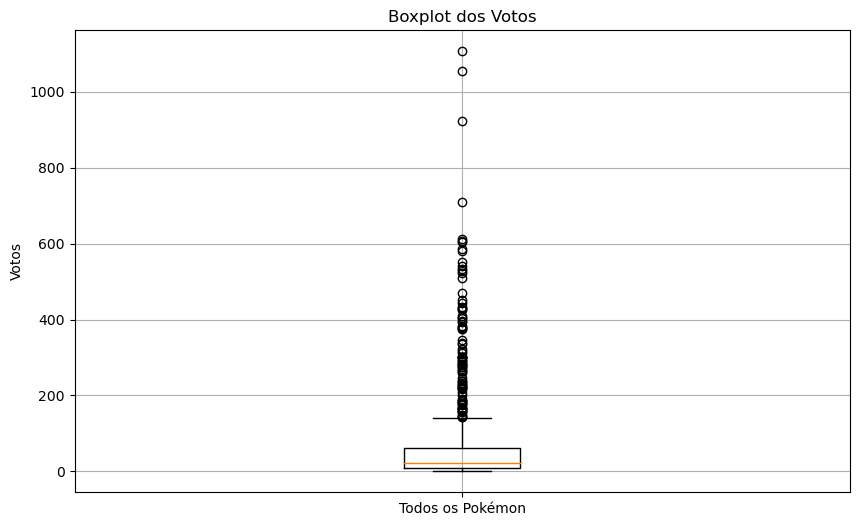

In [14]:
plt.figure(figsize=(10, 6))
plt.boxplot(dados['Votos'])
plt.title('Boxplot dos Votos')
plt.ylabel('Votos')
plt.xticks([1], ['Todos os Pokémon'])  # Ajusta os rótulos do eixo x
plt.grid(True)
plt.show()

                                                 TOP 5 POKEMONS

In [15]:
dados_ordenados = dados.sort_values(by = 'Votos', ascending = False)

In [16]:
top_5 = dados_ordenados.head(5)

In [17]:
print("Top 5 mais votados:")
print(top_5)

Top 5 mais votados:
       Pokemon  Votos
5    Charizard   1107
93      Gengar   1056
58    Arcanine    923
0    Bulbasaur    710
256   Blaziken    613


                                        Fazendo graficos utilizando o K-means

                                                   GRAFICO DE BARRAS

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [20]:
dados = dados[['Pokemon', 'Votos']]

In [21]:
scaler = StandardScaler()
dados['Votos_Normalizados'] = scaler.fit_transform(dados[['Votos']])

In [23]:
kmeans = KMeans(n_clusters=3) 
kmeans.fit(dados[['Votos_Normalizados']])

C:\Users\joaov\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [24]:
dados['Cluster'] = kmeans.labels_

In [25]:
medias_por_cluster = dados.groupby('Cluster')['Votos'].mean()

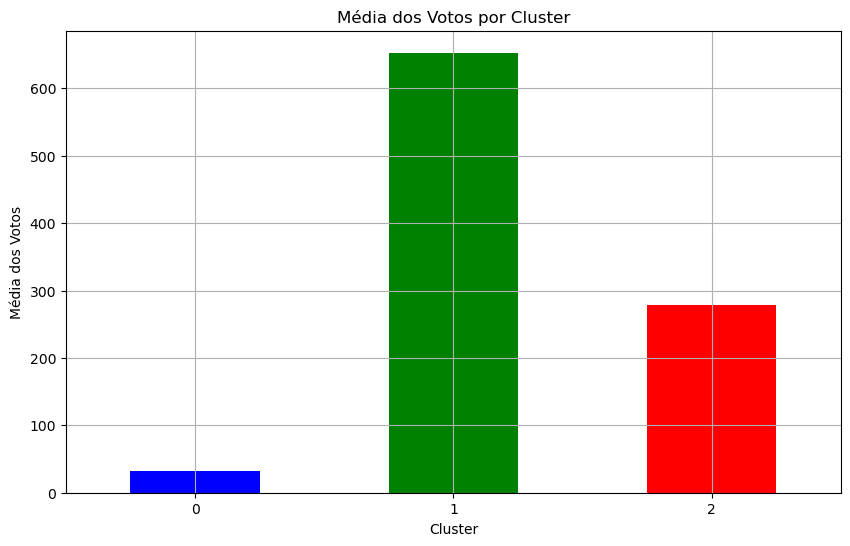

In [26]:
plt.figure(figsize=(10, 6))
medias_por_cluster.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Média dos Votos por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Média dos Votos')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()